# Table of Contents
 <p><div class="lev1 toc-item"><a href="#前提条件" data-toc-modified-id="前提条件-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>前提条件</a></div><div class="lev2 toc-item"><a href="#ポール回しの定義" data-toc-modified-id="ポール回しの定義-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ポール回しの定義</a></div><div class="lev2 toc-item"><a href="#ボールの軌道の条件" data-toc-modified-id="ボールの軌道の条件-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>ボールの軌道の条件</a></div><div class="lev2 toc-item"><a href="#求める解" data-toc-modified-id="求める解-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>求める解</a></div><div class="lev2 toc-item"><a href="#解導出の指針" data-toc-modified-id="解導出の指針-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>解導出の指針</a></div><div class="lev2 toc-item"><a href="#変数" data-toc-modified-id="変数-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>変数</a></div><div class="lev2 toc-item"><a href="#定数" data-toc-modified-id="定数-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>定数</a></div><div class="lev2 toc-item"><a href="#ω0-=-0-の時の方程式" data-toc-modified-id="ω0-=-0-の時の方程式-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>ω0 = 0 の時の方程式</a></div><div class="lev1 toc-item"><a href="#加速度" data-toc-modified-id="加速度-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>加速度</a></div><div class="lev1 toc-item"><a href="#速度" data-toc-modified-id="速度-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>速度</a></div><div class="lev1 toc-item"><a href="#位置" data-toc-modified-id="位置-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>位置</a></div>

# 前提条件

## ポール回しの定義
 - ネットの横を通過するとき，ネットの高さより低い
 - ポールより内側で打つ


## ボールの軌道の条件

①打つ場所1はダブルスコートの右端

(5.485, 0, 0.2)
t = 0

②ポールと同じ高さでボールが通るちょうどの位置を通過

(6.432, 11.885, 1.07)
t = ?

③プレーヤーから見てダブルスコートの右隅にボールが着地

(5.485, 23.77, 0)
t = t1

## 求める解
ボールの運動エネルギーが最小になる解

重心の並進運動と回転運動の式から導出



## 解導出の指針
Nを1～100rpsの範囲で1rps刻み，v0を1～100km/hの範囲で1km/h刻みで変える．

定めたN,とv0，p_z，p_x, p_yより，t = t1にて(5.485, 23.77, 0)を満たすθ0，φ0，t1を求める

## 変数

①回転数
N

②初速
v0

③投射角
φ0

④打つ方向
θ0

## 定数
m = 57.7 * 10**(-3) #ボールの質量 kg

g = 9.8 #重力加速度 m/s2

t = np.arange(0, 2.1, 0.01) #時間 sec

player_pos = 5.485 #プレーヤーの位置

v0 = 100 * 1000 / 3600 #ボールの初速

l0 = 1.7 #プレーヤーの身長

l1 = - 0.0254 * 27 #ラケットの長さ

p0 = 0.2 #打点の高さ

angle_ball = 15 #ボールを打つ方向★

φ0 = 10 #ボールの投射角★

ω0 = 0 # ボールの回転角

e = 0.5 #ボールの反発係数

ρ = 1.184 #空気の密度

d = 0.067 #ボールの直径

N = 4900 / 60 #ボールの回転数★



## ω0 = 0 の時の方程式

$$ p_{x} = -\frac{1}{16}\pi^2 \frac{\rho}{m} d^3 N v_{0} \cos \theta_{0} t^{2} + (v_{0} \sin \theta_{0}) t + p_{0_{x}} $$
$$ p_{y} = \frac{1}{16}\pi^2 \frac{\rho}{m} d^3 N v_{0} \sin \theta_{0} t^{2} + (v_{0} \cos \theta_{0}) t + p_{0_{y}} $$
$$ p_{z} =  -\frac{1}{2} g t^{2} + (v_{0} \sin \phi_{0}) t + p_{0_{z}} $$

In [1]:
import numpy as np
import math as math
import pandas as pd
import sympy as sp

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import itertools

from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division

import time
import copy

#%matplotlib notebook

from matplotlib.ticker import *
import matplotlib.pyplot as plt

In [2]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx], idx

In [3]:
m = 57.7 * 10**(-3)
r = 3.3 * 10**(-2)
g = 9.8 #重力加速度
t = np.arange(0, 2.1, 0.01) #時間
player_pos = 5.485 #プレーヤーの位置
v0 = 60 * 1000 / 3600 #ボールの初速 (m/sec)
l0 = 1.7 #プレーヤーの身長
l1 = - 0.0254 * 27 #ラケットの長さ
p0 = 0.2 #打点の高さ

angle_direction = 15 #ボールを打つ方向★
angle_projection= 10 #ボールの投射角★
angle_rotation = 0 # ボールの回転角

"""angle_ball = 15 #ボールを打つ方向★
φ0 = 10 #ボールの投射角★
ω0 = 0 # ボールの回転角
"""
e = 0.5 #ボールの反発係数

density_ball = 1.184 #空気の密度
d = 0.067 #ボールの直径
N = 4900 / 60  #ボールの回転数 (rad/sec)

I = 2/5 * m * r**2
Energy = (1/2 * m * v0**2) + (1/2 * I * (N *2*np.pi) **2) #エネルギーはrad/secで計算

In [4]:
coat_z = np.array([0, 0, 0, 0, 0])

coat_x_1 = np.array([-5.485, 5.485, 5.485, -5.485, -5.485])
coat_y_1 = np.array([0, 0, 23.77, 23.77, 0])

coat_x_2 = np.array([-4.115, 4.115, 4.115, -4.115, -4.115])
coat_y_2 = np.array([0, 0, 5.485, 5.485, 0])

coat_x_3 = np.array([-4.115, 0, 0, -4.115, -4.115])
coat_y_3 = np.array([5.485, 5.485, 11.885, 11.885, 5.485])

coat_x_4 = np.array([4.115, 0, 0, 4.115, 4.115])
coat_y_4 = np.array([5.485, 5.485, 11.885, 11.885, 5.485])

coat_x_5 = np.array([-4.115, 0, 0, -4.115, -4.115])
coat_y_5 = np.array([11.885, 11.885, 18.285, 18.285, 11.885])

coat_x_6 = np.array([4.115, 0, 0, 4.115, 4.115])
coat_y_6 = np.array([11.885, 11.885, 18.285, 18.285, 11.885])

coat_x_7 = np.array([-4.115, 4.115, 4.115, -4.115, -4.115])
coat_y_7 = np.array([18.285, 18.285, 23.77, 23.77, 18.285])

net_right_x = np.array([-6.399, -6.399, 0, 0, -6.399])
net_right_y = np.array([11.885, 11.885, 11.885, 11.885, 11.885])
net_right_z = np.array([0, 1.07, 0.914, 0, 0])

net_left_x = np.array([6.399, 6.399, 0, 0, 6.399])
net_left_y = np.array([11.885, 11.885, 11.885, 11.885, 11.885])
net_left_z = np.array([0, 1.07, 0.914, 0, 0])


coat_x = np.array([coat_x_1, coat_x_2, coat_x_3, coat_x_4, coat_x_5, coat_x_6, coat_x_7])
coat_y = np.array([coat_y_1, coat_y_2, coat_y_3, coat_y_4, coat_y_5, coat_y_6, coat_y_7])

#coat_y_1 = np.array([-5.485, 5.485, 5.485, -5.485, -5.485])

In [5]:
print(Energy)
print(1/2 * m * v0**2)
print(1/2 * I * (N *2*np.pi)**2)

11.32278463948994
8.013888888888891
3.3088957506010495


m = 57.7 * 10**(-3)
g = 9.8 #重力加速度
t = np.arange(0, 2.1, 0.01) #時間
player_pos = 5.485 #プレーヤーの位置
velosity_ball_init = 100 * 1000 / 3600 #ボールの初速

height_player = 1.7 #プレーヤーの身長
length_racket = - 0.0254 * 27 #ラケットの長さ
hieght_hitting_point = 0.2 #打点の高さ

angle_direction = 15 #ボールを打つ方向★
angle_projection= 10 #ボールの投射角★
angle_rotation = 0 # ボールの回転角

e_ball = 0.5 #ボールの反発係数

density_ball = 1.184 #空気の密度
diameter_ball = 0.067 #ボールの直径
rotation_ball = 4900 / 60 #ボールの回転数★

In [6]:
p_0 = [5.485, 0, 0.2] #ボールを打つ位置
p_1 = [6.5, 11.885, 1.07] #ポールを回る時の位置
p_2 = [5.485, 23.77, 0] #コートに着地した時の位置
#p_2 = [5.485, 23.77, 0]

#ω0 = 0 の時の方程式

$$ p_{x} = -\frac{1}{16}\pi^2 \frac{\rho}{m} d^3 N v_{0} \cos \theta_{0} t^{2} + (v_{0} \sin \theta_{0}) t + p_{0_{x}} $$
$$ p_{y} = \frac{1}{16}\pi^2 \frac{\rho}{m} d^3 N v_{0} \sin \theta_{0} t^{2} + (v_{0} \cos \theta_{0}) t + p_{0_{y}} $$
$$ p_{z} =  -\frac{1}{2} g t^{2} + (v_{0} \sin \phi_{0}) t + p_{0_{z}} $$

#ω0 = 0 の時の方程式
#ボールが飛んでく角度を時間変数

$$ p_{x} = -\frac{1}{16}\pi^2 \frac{\rho}{m} d^3 N v_{0} \cos \theta_{0} t^{2} + (v_{0} \sin \theta_{0}) t + p_{0_{x}} $$
$$ p_{y} = \frac{1}{16}\pi^2 \frac{\rho}{m} d^3 N v_{0} \sin \theta_{0} t^{2} + (v_{0} \cos \theta_{0}) t + p_{0_{y}} $$
$$ p_{z} =  -\frac{1}{2} g t^{2} + (v_{0} \sin \phi_{0}) t + p_{0_{z}} $$

#ω0 = 0 の時の方程式
#ボールが飛んでく角度を時間変数

$$ p_{x_{0}} = 5.485 $$
$$ p_{y_{0}} = 0 $$
$$ p_{z_{0}} = 0.2 $$

$$ p_{x_{i}} = -\frac{1}{16}\pi^2 \frac{\rho}{m} d^3 N v_{0} \cos \theta_{i-1} t^{2} + (v_{0} \sin \theta_{i-1}) t + p_{0_{x}} $$
$$ p_{y_{i}} = \frac{1}{16}\pi^2 \frac{\rho}{m} d^3 N v_{0} \sin \theta_{i-1} t^{2} + (v_{0} \cos \theta_{i-1}) t + p_{0_{y}} $$
$$ p_{z_{i}} =  -\frac{1}{2} g t^{2} + (v_{0} \sin \phi_{0}) t + p_{0_{z}} $$

$$ \theta_{i}\ = arctan \left( \frac{p_{y_{i}} - p_{y_{i-1}}}{p_{x_{i}} - p_{x_{i-1}}} \right) $$

$$ p_{x} = -\frac{1}{16}\pi^2 \frac{\rho}{m} d^3 N v_{0} \cos \theta_{0} t^{2} + (v_{0} \sin \theta_{0}) t + p_{0_{x}} $$
$$ p_{y} = \frac{1}{16}\pi^2 \frac{\rho}{m} d^3 N v_{0} \sin \theta_{0} t^{2} + (v_{0} \cos \theta_{0}) t + p_{0_{y}} $$
$$ p_{z} =  -\frac{1}{2} g t^{2} + (v_{0} \sin \phi_{0}) t + p_{0_{z}} $$

$$ v_{x} = -\frac{1}{8}\pi^2 \frac{\rho}{m} d^3 N v_{0} \cos \theta_{0} t + (v_{0} \sin \theta_{0}) $$
$$ v_{y} = \frac{1}{8}\pi^2 \frac{\rho}{m} d^3 N v_{0} \sin \theta_{0} t^{2} + (v_{0} \cos \theta_{0}) $$
$$ v_{z} =  -g t + (v_{0} \sin \phi_{0})$$

$$ a_{x} =  -\frac{1}{8}\pi^2 \frac{\rho}{m} d^3 N v_{0} \cos \theta_{0} $$
$$ a_{y} =  \frac{1}{8}\pi^2 \frac{\rho}{m} d^3 N v_{0} \sin \theta_{0} $$
$$ a_{z} =  -g $$

$$ j_{x} =  -\frac{1}{8}\pi^2 \frac{\rho}{m} d^3 N v_{0} \cos \omega t $$
$$ j_{y} =  \frac{1}{8}\pi^2 \frac{\rho}{m} d^3 N v_{0} \sin \theta_{0} $$
$$ j_{z} =  0 $$

In [ ]:
v_x = 1/8 * np.pi**2 * density_ball * d**3 * (v0 * np.cos(angle_rotation * (np.pi/180))) * N * np.cos(angle_direction_0 * (np.pi/180)) / m * t + v0 * np.cos(angle_direction_0 * (np.pi/180))
v_y = 1/8 * np.pi**2 * density_ball * d**3 * (v0 * np.cos(angle_rotation * (np.pi/180))) * N * np.sin(angle_direction_0 * (np.pi/180)) / m * t + v0 * np.sin(angle_direction_0 * (np.pi/180))
v_z = 1/8 * np.pi**2 * density_ball * d**3 * (v0 * np.sin(angle_rotation * (np.pi/180))) * N / m * t - g * t + v0 * np.sin(angle_projection_0 * (np.pi/180))

angle_direction = p_y / p_x

In [7]:
v0 = 100 * 1000 / 3600 #ボールの初速 (m/sec)
n = 3000 / 60

angle_direction_0 = 45
angle_projection_0 = 8

In [8]:
t = sp.symbols('t')
p_z_buf1 = - 1/2 * g * t**2 + v0 * sp.sin(angle_projection_0 * (np.pi/180)) * t + p_0[2] - p_2[2]
t_1_buf1 = sp.solve([p_z_buf1], [t])[1][0]

#if t = int:
print('t_1: ', round(t_1_buf1, 2), 'sec')
    
#print('t_1', round(t_1_buf1, 2), 'sec')

t_1:  0.84 sec


In [9]:
time = np.arange(0, round(t_1_buf1, 2) + 0.01, 0.001)

In [61]:
time = np.arange(0, 2, 0.1)

In [62]:
time

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9])

In [69]:
angle_direction = 20

In [72]:
x = ( - 1/16 * np.pi**2 * density_ball * d**3 * v0 * N * np.cos(angle_direction * (np.pi/180)) * time) / m * time**2 + v0 * np.sin(angle_direction * (np.pi/180) * time) * time + p_0[0]
y = (  1/16 * np.pi**2 * density_ball * d**3 * v0 * N * np.sin(angle_direction * (np.pi/180)) * time) / m * time**2 + v0 * np.cos(angle_direction_0 * (np.pi/180) * time) * time + p_0[1]
y =  v0 * np.cos(angle_direction_0 * (np.pi/180) * time) * time + p_0[1]

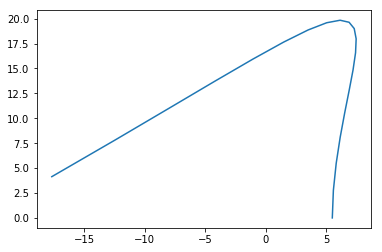

In [73]:
plt.plot(x, y)
plt.show()

In [66]:
p_x = []
p_y = []
angle_direction = []

for i in range(10):
    if i == 0:
        p_x_buf1 = p_0[0]
        p_y_buf1 = p_0[1]
        angle_direction_buf1 = angle_direction_0

    else:
        p_x_buf1 = ( - 1/16 * np.pi**2 * density_ball * d**3 * v0 * N * sp.cos(angle_direction_buf1 * (np.pi/180))) / m * time[i]**2 + v0 * sp.sin(angle_direction_buf1 * (np.pi/180)) * time[i] + p_0[0]
        p_y_buf1 = v0 * sp.cos(angle_direction_buf1 * (np.pi/180)) * time[i] + p_0[1]
        angle_direction_buf1 = np.arctan(float((p_x_buf1 - p_x[i-1])/(p_y_buf1 - p_y[i-1]))) * (180/np.pi)

    p_x.append(p_x_buf1)
    p_y.append(p_y_buf1)
    angle_direction.append(angle_direction_buf1)
    
    print(i, 'コマ')
    print(p_x_buf1)
    print(p_y_buf1)
    print(angle_direction_buf1)

0 コマ
5.485
0
45
1 コマ
7.38811838997628
1.96418550329597
44.0953394944
2 コマ
9.10276299823877
3.98990500970383
40.245822367
3 コマ
10.2756379875685
6.36066315735341
26.322785502
4 コマ
9.17346079332205
9.95900175607303
-17.0299149688
5 コマ
-0.647030782596926
13.2798885285891
-71.3165755507
6 コマ
-11.2993265364220
5.33898251992957
53.2967863692
7 コマ
18.5452485897722
11.6213633740355
78.1126059889
8 コマ
26.0921173460411
4.57753095029557
-46.9745759355
9 コマ
-17.5643396050987
17.0580704786369
-74.0457879799


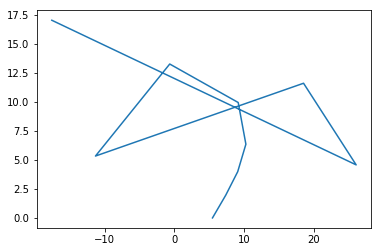

In [67]:
plt.plot(p_x, p_y)
plt.show()

In [68]:
p_x

[5.485,
 7.38811838997628,
 9.10276299823877,
 10.2756379875685,
 9.17346079332205,
 -0.647030782596926,
 -11.2993265364220,
 18.5452485897722,
 26.0921173460411,
 -17.5643396050987]

In [23]:
p_y

[0,
 0.0196418550329597,
 0.0392898172518260,
 0.0589713775204477,
 0.0787873175550780,
 0.0991847432985816,
 0.122489629994408,
 0.161186522169059,
 0.220805758644648,
 0.101623014341013]

In [17]:
angle_direction

[45,
 44.991091900897324,
 44.955437341596884,
 44.839413183249086,
 44.428042772234853,
 42.698041144583719,
 34.008023514771239]

In [90]:
i

9

In [45]:
angle_direction

[]

In [100]:
p_x = []
p_y = []

for t in time:
    if t == 0:
        p_x_1 = ( - 1/16 * np.pi**2 * density_ball * d**3 * v0 * N * sp.cos(angle_direction_0 * (np.pi/180))) / m * t**2 + v0 * sp.sin(angle_direction_0 * (np.pi/180)) * t + p_0[0] + p_2[0]
        p_y_1 = v0 * sp.cos(angle_direction_0 * (np.pi/180)) * t + p_0[1] + p_2[1]
        
        angle_direction = np.arctan(float((p_x_1 - p_0[0])/(p_y_1 - p_0[1]))) * (180/np.pi)
        
    else:       
        p_x_buf1 = ( - 1/16 * np.pi**2 * density_ball * d**3 * v0 * N * sp.cos(angle_direction * (np.pi/180))) / m * t**2 + v0 * sp.sin(angle_direction * (np.pi/180)) * t + p_0[0]
        p_y_buf1 = v0 * sp.cos(angle_direction * (np.pi/180)) * t + p_0[1]
        
        p_x.append(p_x_buf1)
        p_y.append(p_y_buf1)
        
        

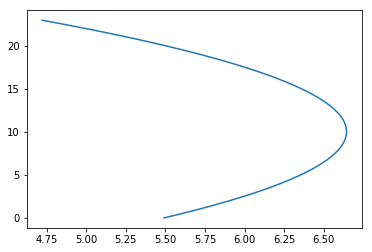

In [102]:
plt.plot(p_x, p_y)
plt.show()

In [35]:
p_y

[0.270665180559490,
 0.541330361118980,
 0.811995541678470,
 1.08266072223796,
 1.35332590279745,
 1.62399108335694,
 1.89465626391643,
 2.16532144447592,
 2.43598662503541,
 2.70665180559490,
 2.97731698615439,
 3.24798216671388,
 3.51864734727337,
 3.78931252783286,
 4.05997770839235,
 4.33064288895184,
 4.60130806951133,
 4.87197325007082,
 5.14263843063031,
 5.41330361118980,
 5.68396879174929,
 5.95463397230878,
 6.22529915286827,
 6.49596433342776,
 6.76662951398725,
 7.03729469454674,
 7.30795987510623,
 7.57862505566572,
 7.84929023622521,
 8.11995541678470,
 8.39062059734419,
 8.66128577790368,
 8.93195095846317,
 9.20261613902266,
 9.47328131958215,
 9.74394650014164,
 10.0146116807011,
 10.2852768612606,
 10.5559420418201,
 10.8266072223796,
 11.0972724029391,
 11.3679375834986,
 11.6386027640581,
 11.9092679446176,
 12.1799331251770,
 12.4505983057365,
 12.7212634862960,
 12.9919286668555,
 13.2625938474150,
 13.5332590279745,
 13.8039242085340,
 14.0745893890935,
 14.34525

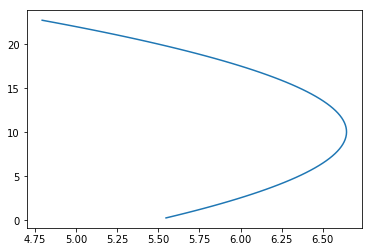

In [13]:
plt.plot(p_x, p_y)
plt.show()

In [16]:
p_z = list(- 1/2 * g * time**2 + v0 * sp.sin(angle_projection_0 * (np.pi/180)) * time + p_0[2] - p_2[2])

In [17]:
X = np.array(p_x)
Y = np.array(p_y)
Z = np.array(p_z)

X = np.array(p_x)
Y = np.array(p_y)
Z = np.array(p_z)

X = copy.copy(p_x)
Y = copy.copy(p_y)
Z = copy.copy(p_z)

In [33]:
len(Y)

84

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x_min = - 15
x_max = 15
y_min = 0
y_max = 30
z_min = 0
z_max = 15

#ax.set_xlim([x_min, x_max][::-1])
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([z_min, z_max])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

for i in range(7):
    ax.plot_wireframe(coat_x[i], coat_y[i], coat_z)

ax.plot_wireframe(net_right_x, net_right_y, net_right_z)
ax.plot_wireframe(net_left_x, net_left_y, net_left_z)

# ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)
#for i in range(len(t_1)):

ax.plot(X, Y, Z)
    
"""print('(i,j); ', snake_condition[i][j][0])
print('Energy: ', round(snake_condition[i][j][1], 2), 'J')
print('v0: ', round(snake_condition[i][j][2], 2), 'km/h')
print('N: ', round(snake_condition[i][j][3], 2), 'rpm')
print('θ0: ', round(snake_condition[i][j][4], 2), '°')
print('φ0: ', round(snake_condition[i][j][5], 2), '°')"""

plt.show()

ValueError: third arg must be a format string

In [24]:
#from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(X, Y, Z)
plt.show()

ValueError: third arg must be a format string

In [57]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x_min = - 15
x_max = 15
y_min = 0
y_max = 30
z_min = 0
z_max = 15

#ax.set_xlim([x_min, x_max][::-1])
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([z_min, z_max])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

for i in range(7):
    ax.plot_wireframe(coat_x[i], coat_y[i], coat_z)

ax.plot_wireframe(net_right_x, net_right_y, net_right_z)
ax.plot_wireframe(net_left_x, net_left_y, net_left_z)

# ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)
#for i in range(len(t_1)):
ax.plot(X, Y, Z)

plt.show()

ValueError: third arg must be a format string

In [11]:
np.arctan(float((p_x_1 - p_0[0])/(p_y_1 - p_0[1]))) * (np.pi/180)

0.0039581185097081464

In [12]:
angle_direction

12.993736577768923

In [13]:
print(p_x, p_y)

[5.54661530983823, 5.60654760743294, 5.66479689278413, 5.72136316589181, 5.77624642675597, 5.82944667537661, 5.88096391175374, 5.93079813588735, 5.97894934777745, 6.02541754742403, 6.07020273482710, 6.11330490998665, 6.15472407290268, 6.19446022357520, 6.23251336200420, 6.26888348818968, 6.30357060213165, 6.33657470383011, 6.36789579328504, 6.39753387049646, 6.42548893546437, 6.45176098818876, 6.47635002866963, 6.49925605690699, 6.52047907290083, 6.54001907665115, 6.55787606815796, 6.57405004742126, 6.58854101444103, 6.60134896921729, 6.61247391175004, 6.62191584203927, 6.62967476008498, 6.63575066588718, 6.64014355944586, 6.64285344076102, 6.64388030983267, 6.64322416666080, 6.64088501124542, 6.63686284358652, 6.63115766368411, 6.62376947153818, 6.61469826714873, 6.60394405051577, 6.59150682163929, 6.57738658051929, 6.56158332715578, 6.54409706154875, 6.52492778369821, 6.50407549360415, 6.48154019126657, 6.45732187668548, 6.43142054986088, 6.40383621079275, 6.37456885948111, 6.3436184

In [57]:
plt.plot(p_x, p_y)

In [18]:
p_z_buf1 = - 1/2 * g * t**2 + v0 * sp.sin(angle_projection_0 * (np.pi/180)) * t + p_0[2] - p_2[2]
angle_direction_0_buf1, angle_projection_0_buf1, t_1_buf1 = sp.solve([p_x_buf1, p_y_buf1, p_z_buf1], [angle_direction, angle_projection, t])[0]


angle_direction = sp.symbols('angle_direction') #ボールを打つ方向（水平）
angle_projection= sp.symbols('angle_projection') #ボールの仰角（鉛直）
t = sp.symbols('t') #ボールが着地するときの時間

p_x_buf1 = ( - 1/16 * np.pi**2 * density_ball * d**3 * v0 * N * sp.cos(angle_direction * (np.pi/180))) / m * t**2 + v0 * sp.sin(angle_direction * (np.pi/180)) * t + p_0[0] - p_2[0]
p_y_buf1 = v0 * sp.cos(angle_direction * (np.pi/180)) * t + p_0[1] - p_2[1]
p_z_buf1 = - 1/2 * g * t**2 + v0 * sp.sin(angle_projection * (np.pi/180)) * t + p_0[2] - p_2[2]

#p_x = ( - 1/16 * np.pi**2 * density_ball * d**3 * (v0 * np.cos(angle_rotation * (np.pi/180))) * N * np.cos(angle_direction * (np.pi/180))) / m * t**2 + v0 * np.sin(angle_direction * (np.pi/180)) * t + player_pos
#p_y = ( 1/16 * np.pi**2 *density_ball * d**3 * (v0 * np.cos(angle_rotation * (np.pi/180))) * N * np.sin(angle_direction * (np.pi/180)) * t**2) / m + v0 * np.cos(angle_direction * (np.pi/180)) * t
#p_z = ( 1/16 * np.pi**2 * density_ball * d**3 * (v0 * np.sin(angle_rotation * (np.pi/180))) * N * t**2) / m - 1/2 * g * t**2 + v0 * np.sin(angle_projection * (np.pi/180)) * t + p0

#sp.init_printing()
angle_direction_0_buf1, angle_projection_0_buf1, t_1_buf1 = sp.solve([p_x_buf1, p_y_buf1, p_z_buf1], [angle_direction, angle_projection, t])[0]

In [18]:
angle_direction = sp.symbols('angle_direction') #ボールを打つ方向（水平）
angle_projection= sp.symbols('angle_projection') #ボールの仰角（鉛直）
t = sp.symbols('t') #ボールが着地するときの時間

p_x_buf1 = ( - 1/16 * np.pi**2 * density_ball * d**3 * v0 * N * sp.cos(angle_direction * (np.pi/180))) / m * t**2 + v0 * sp.sin(angle_direction * (np.pi/180)) * t + p_0[0] - p_2[0]
p_y_buf1 = v0 * sp.cos(angle_direction * (np.pi/180)) * t + p_0[1] - p_2[1]
p_z_buf1 = - 1/2 * g * t**2 + v0 * sp.sin(angle_projection * (np.pi/180)) * t + p_0[2] - p_2[2]

#p_x = ( - 1/16 * np.pi**2 * density_ball * d**3 * (v0 * np.cos(angle_rotation * (np.pi/180))) * N * np.cos(angle_direction * (np.pi/180))) / m * t**2 + v0 * np.sin(angle_direction * (np.pi/180)) * t + player_pos
#p_y = ( 1/16 * np.pi**2 *density_ball * d**3 * (v0 * np.cos(angle_rotation * (np.pi/180))) * N * np.sin(angle_direction * (np.pi/180)) * t**2) / m + v0 * np.cos(angle_direction * (np.pi/180)) * t
#p_z = ( 1/16 * np.pi**2 * density_ball * d**3 * (v0 * np.sin(angle_rotation * (np.pi/180))) * N * t**2) / m - 1/2 * g * t**2 + v0 * np.sin(angle_projection * (np.pi/180)) * t + p0

#sp.init_printing()
angle_direction_0_buf1, angle_projection_0_buf1, t_1_buf1 = sp.solve([p_x_buf1, p_y_buf1, p_z_buf1], [angle_direction, angle_projection, t])[0]

In [13]:
print('angle_direction_0: ', round(angle_direction_0_buf1, 2), '°')
print('angle_projection_0: ' , round(angle_projection_0_buf1, 2), '°')
print('t_1', round(t_1_buf1, 2), 'sec')

angle_direction_0:  26.32 °
angle_projection_0:  27.4 °
t_1 1.59 sec


In [14]:
angle_direction_0_buf1

26.3216452813538

In [16]:
initial_velosity = np.arange(90, 151, 10) * 1000 / 3600 #m/sec
spin_rate = np.arange(1500, 5001, 100) / 60 #rps

In [17]:
print('initial_velosity', np.array(initial_velosity) * (3600/1000), 'km/h')
print('spin_rate', np.array(spin_rate) * (60), 'rpm')

initial_velosity [  90.  100.  110.  120.  130.  140.  150.] km/h
spin_rate [ 1500.  1600.  1700.  1800.  1900.  2000.  2100.  2200.  2300.  2400.
  2500.  2600.  2700.  2800.  2900.  3000.  3100.  3200.  3300.  3400.
  3500.  3600.  3700.  3800.  3900.  4000.  4100.  4200.  4300.  4400.
  4500.  4600.  4700.  4800.  4900.  5000.] rpm


In [18]:
start = time.time()

parameters_v0_N = []
angle_direction_0 = []
angle_projection_0 = []
t_1 = []

angle_direction = sp.symbols('angle_direction') #ボールを打つ方向（水平）
angle_projection= sp.symbols('angle_projection') #ボールの仰角（鉛直）
t = sp.symbols('t_1') #ボールが着地するときの時間

for v0 in initial_velosity:
    angle_direction_0_buf2 = []
    angle_projection_0_buf2 = []
    t_1_buf2 = []
    
    for N in spin_rate:            
        p_x_buf1 = ( - 1/16 * np.pi**2 * density_ball * d**3 * v0 * N * sp.cos(angle_direction * (np.pi/180))) / m * t**2 + v0 * sp.sin(angle_direction * (np.pi/180)) * t + p_0[0] - p_2[0]
        p_y_buf1 = v0 * sp.cos(angle_direction * (np.pi/180)) * t + p_0[1] - p_2[1]
        p_z_buf1 = - 1/2 * g * t**2 + v0 * sp.sin(angle_projection * (np.pi/180)) * t + p_0[2] - p_2[2]

        angle_direction_0_buf1, angle_projection_0_buf1, t_1_buf1 = sp.solve([p_x_buf1, p_y_buf1, p_z_buf1], [angle_direction, angle_projection, t])[0]
               
        angle_direction_0_buf2.append(angle_direction_0_buf1)
        angle_projection_0_buf2.append(angle_projection_0_buf1)
        t_1_buf2.append(t_1_buf1)

    angle_direction_0.append(angle_direction_0_buf2)
    angle_projection_0.append(angle_projection_0_buf2)
    t_1.append(t_1_buf2)

end = time.time()
print(round(end - start, 2), 'sec')

386.36 sec


In [19]:
print('angle_direction_0: ', round(angle_direction_0_buf1, 2), '°')
print('angle_projection_0: ' , round(angle_projection_0_buf1, 2), '°')
print('t_1', round(t_1_buf1, 2), 'sec')

angle_direction_0:  10.43 °
angle_projection_0:  3.44 °
t_1 0.58 sec


In [20]:
t = []
p_x = []
p_y = []
p_z = []

for i in range(len(t_1)):
    t_buf2 = []
    p_x_buf2 = []
    p_y_buf2 = []
    p_z_buf2 = []
    for j in range(len(t_1[i])):
        
        t_buf1 = np.arange(0, round(t_1[i][j], 2), 0.01)
        
        p_x_buf1 = ( - 1/16 * np.pi**2 * density_ball * d**3 * v0 * spin_rate[j] * sp.cos(angle_direction_0[i][j] * (np.pi/180))) / m * t_buf1**2 + v0 * sp.sin(angle_direction_0[i][j] * (np.pi/180)) * t_buf1 + p_0[0]
        p_y_buf1 = initial_velosity[i] * sp.cos(angle_direction_0[i][j] * (np.pi/180)) * t_buf1 + p_0[1]
        p_z_buf1 = - 1/2 * g * t_buf1**2 + initial_velosity[i] * sp.sin(angle_projection_0[i][j] * (np.pi/180)) * t_buf1 + p_0[2] - p_2[2]
        
        
        t_buf2.append(t_buf1)
        
        p_x_buf2.append(p_x_buf1)
        p_y_buf2.append(p_y_buf1)
        p_z_buf2.append(p_z_buf1)
    
    t.append(t_buf2)
    
    p_x.append(p_x_buf2)
    p_y.append(p_y_buf2)
    p_z.append(p_z_buf2)

        

In [21]:
coat_z = np.array([0, 0, 0, 0, 0])

coat_x_1 = np.array([-5.485, 5.485, 5.485, -5.485, -5.485])
coat_y_1 = np.array([0, 0, 23.77, 23.77, 0])

coat_x_2 = np.array([-4.115, 4.115, 4.115, -4.115, -4.115])
coat_y_2 = np.array([0, 0, 5.485, 5.485, 0])

coat_x_3 = np.array([-4.115, 0, 0, -4.115, -4.115])
coat_y_3 = np.array([5.485, 5.485, 11.885, 11.885, 5.485])

coat_x_4 = np.array([4.115, 0, 0, 4.115, 4.115])
coat_y_4 = np.array([5.485, 5.485, 11.885, 11.885, 5.485])

coat_x_5 = np.array([-4.115, 0, 0, -4.115, -4.115])
coat_y_5 = np.array([11.885, 11.885, 18.285, 18.285, 11.885])

coat_x_6 = np.array([4.115, 0, 0, 4.115, 4.115])
coat_y_6 = np.array([11.885, 11.885, 18.285, 18.285, 11.885])

coat_x_7 = np.array([-4.115, 4.115, 4.115, -4.115, -4.115])
coat_y_7 = np.array([18.285, 18.285, 23.77, 23.77, 18.285])

net_right_x = np.array([-6.399, -6.399, 0, 0, -6.399])
net_right_y = np.array([11.885, 11.885, 11.885, 11.885, 11.885])
net_right_z = np.array([0, 1.07, 0.914, 0, 0])

net_left_x = np.array([6.399, 6.399, 0, 0, 6.399])
net_left_y = np.array([11.885, 11.885, 11.885, 11.885, 11.885])
net_left_z = np.array([0, 1.07, 0.914, 0, 0])


coat_x = np.array([coat_x_1, coat_x_2, coat_x_3, coat_x_4, coat_x_5, coat_x_6, coat_x_7])
coat_y = np.array([coat_y_1, coat_y_2, coat_y_3, coat_y_4, coat_y_5, coat_y_6, coat_y_7])

#coat_y_1 = np.array([-5.485, 5.485, 5.485, -5.485, -5.485])

In [22]:
X = copy.copy(p_x)
Y = copy.copy(p_y)
Z = copy.copy(p_z)

In [23]:
t_net_idx = find_nearest(p_y[i][j], 23.88/2)[1]

29

In [25]:
(1/2 * m * initial_velosity[i]**2) + (1/2 * I * spin_rate[j]**2)

50.174076805555551

In [33]:
snake_condition = []
energy_all = []
for i in range(len(p_x)):
    snake_condition_buf2 = []
    for j in range(len(p_x[i])):
        t_net_idx = find_nearest(p_y[i][j], 23.88/2)[1]
        
        if p_x[i][j][t_net_idx] >= 6.432 and 0 < p_z[i][j][t_net_idx] <= 1.07:
            energy = (1/2 * m * initial_velosity[i]**2) + (1/2 * I * (spin_rate[j] * 2*np.pi)**2)
            snake_condition_buf1 = ((i,j), energy, initial_velosity[i]* (3600/1000), spin_rate[j] * 60, angle_direction_0[i][j], angle_projection_0[i][j], t_1[i][j])
            energy_all.append(energy)
        
        else:
            continue
            
        snake_condition_buf2.append(snake_condition_buf1)
    
    snake_condition.append(snake_condition_buf2)

In [34]:
# snake_condtion = ((i,j), energy, initial_velosity[i], spin_rate[j], angle_direction_0[i][j], angle_projection_0[i][j], t_1[i][j]))

<IPython.core.display.Javascript object>


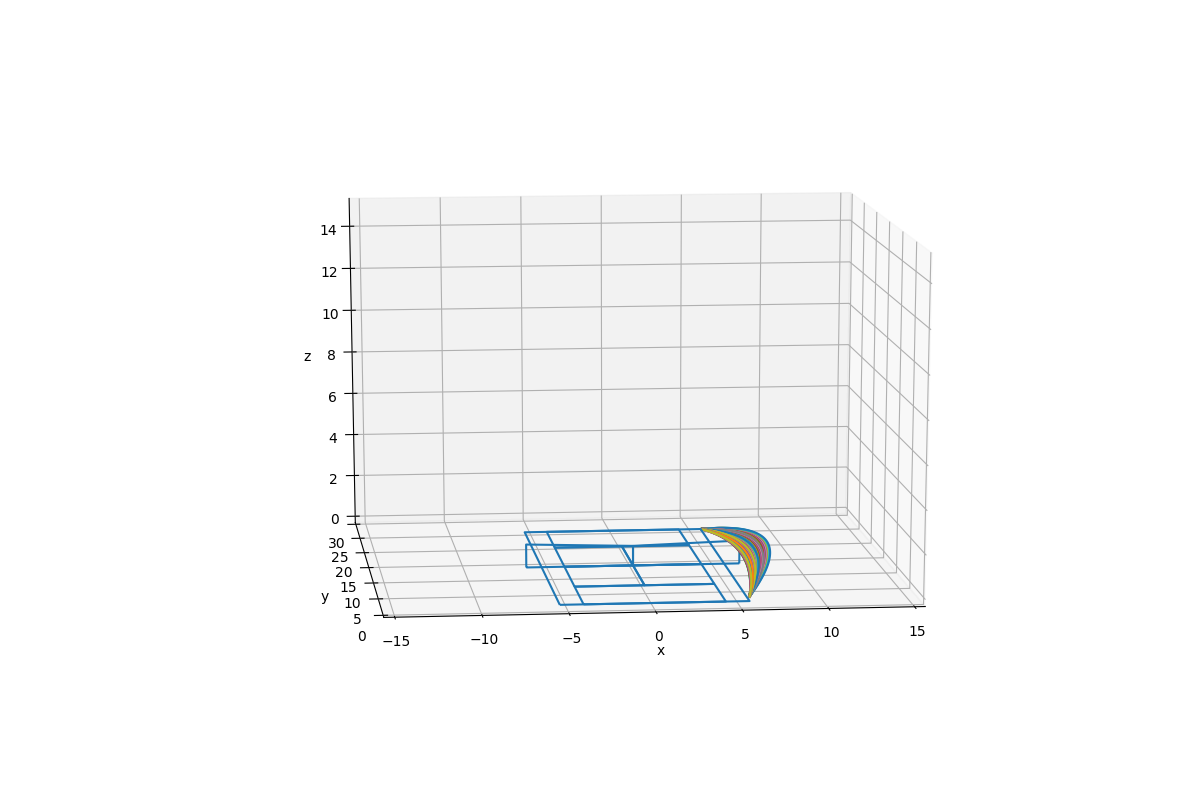

(i,j);  (1, 5)
Energy:  22.81 J
v0:  100.0 km/h
N:  2000.0 rpm
θ0:  6.23 °
φ0:  8.25 °
(i,j);  (1, 6)
Energy:  22.87 J
v0:  100.0 km/h
N:  2100.0 rpm
θ0:  6.55 °
φ0:  8.26 °
(i,j);  (1, 7)
Energy:  22.93 J
v0:  100.0 km/h
N:  2200.0 rpm
θ0:  6.86 °
φ0:  8.26 °
(i,j);  (1, 8)
Energy:  22.99 J
v0:  100.0 km/h
N:  2300.0 rpm
θ0:  7.17 °
φ0:  8.27 °
(i,j);  (1, 9)
Energy:  23.05 J
v0:  100.0 km/h
N:  2400.0 rpm
θ0:  7.49 °
φ0:  8.27 °
(i,j);  (1, 10)
Energy:  23.12 J
v0:  100.0 km/h
N:  2500.0 rpm
θ0:  7.8 °
φ0:  8.28 °
(i,j);  (1, 11)
Energy:  23.19 J
v0:  100.0 km/h
N:  2600.0 rpm
θ0:  8.12 °
φ0:  8.29 °
(i,j);  (1, 12)
Energy:  23.27 J
v0:  100.0 km/h
N:  2700.0 rpm
θ0:  8.43 °
φ0:  8.3 °
(i,j);  (1, 13)
Energy:  23.34 J
v0:  100.0 km/h
N:  2800.0 rpm
θ0:  8.74 °
φ0:  8.3 °
(i,j);  (1, 14)
Energy:  23.42 J
v0:  100.0 km/h
N:  2900.0 rpm
θ0:  9.06 °
φ0:  8.31 °
(i,j);  (1, 15)
Energy:  23.5 J
v0:  100.0 km/h
N:  3000.0 rpm
θ0:  9.37 °
φ0:  8.32 °
(i,j);  (1, 16)
Energy:  23.59 J
v0:  100

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x_min = - 15
x_max = 15
y_min = 0
y_max = 30
z_min = 0
z_max = 15

#ax.set_xlim([x_min, x_max][::-1])
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([z_min, z_max])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

for i in range(7):
    ax.plot_wireframe(coat_x[i], coat_y[i], coat_z)

ax.plot_wireframe(net_right_x, net_right_y, net_right_z)
ax.plot_wireframe(net_left_x, net_left_y, net_left_z)

# ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)
#for i in range(len(t_1)):

for i in range(len(snake_condition)):
    for j in range(len(snake_condition[i])):
        ax.plot(X[snake_condition[i][j][0][0]][snake_condition[i][j][0][1]], 
                Y[snake_condition[i][j][0][0]][snake_condition[i][j][0][1]], 
                Z[snake_condition[i][j][0][0]][snake_condition[i][j][0][1]])
    
        print('(i,j); ', snake_condition[i][j][0])
        print('Energy: ', round(snake_condition[i][j][1], 2), 'J')
        print('v0: ', round(snake_condition[i][j][2], 2), 'km/h')
        print('N: ', round(snake_condition[i][j][3], 2), 'rpm')
        print('θ0: ', round(snake_condition[i][j][4], 2), '°')
        print('φ0: ', round(snake_condition[i][j][5], 2), '°')

plt.show()

<IPython.core.display.Javascript object>


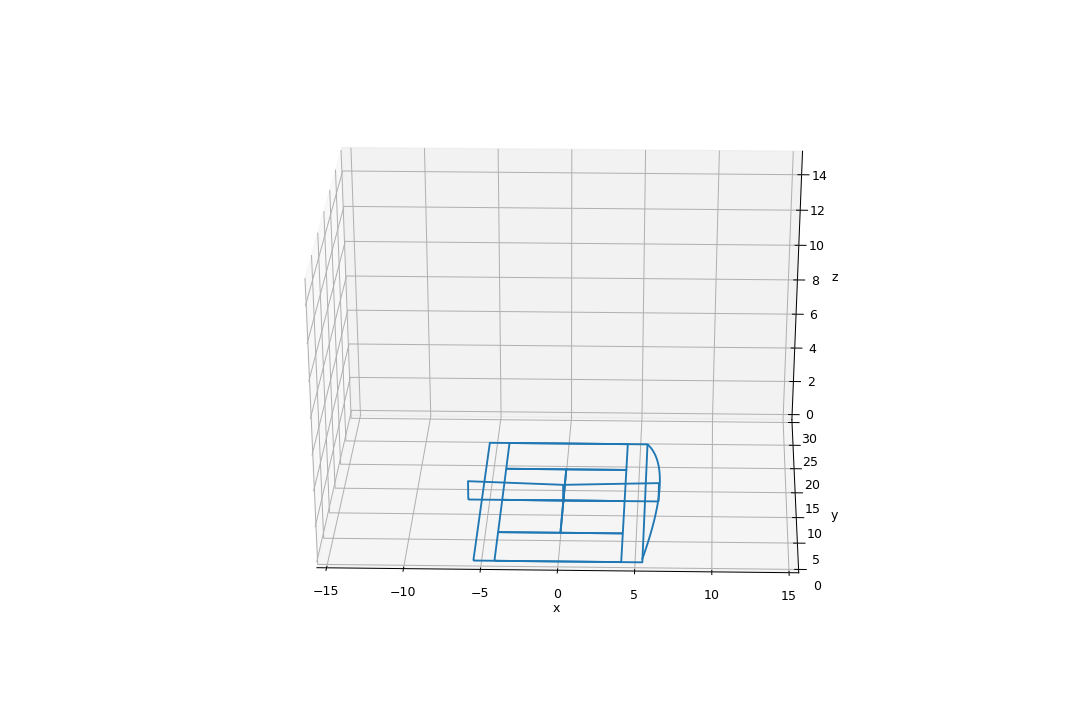

(i,j);  (1, 5)
Energy:  22.81 J
v0:  100.0 km/h
N:  2000.0 rpm
θ0:  6.23 °
φ0:  8.25 °


In [36]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x_min = - 15
x_max = 15
y_min = 0
y_max = 30
z_min = 0
z_max = 15

#ax.set_xlim([x_min, x_max][::-1])
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([z_min, z_max])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

for i in range(7):
    ax.plot_wireframe(coat_x[i], coat_y[i], coat_z)

ax.plot_wireframe(net_right_x, net_right_y, net_right_z)
ax.plot_wireframe(net_left_x, net_left_y, net_left_z)

# ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)
#for i in range(len(t_1)):

for i in range(len(snake_condition)):
    for j in range(len(snake_condition[i])):
        if snake_condition[i][j][1] == min(energy_all):
            ax.plot(X[snake_condition[i][j][0][0]][snake_condition[i][j][0][1]], 
                    Y[snake_condition[i][j][0][0]][snake_condition[i][j][0][1]], 
                    Z[snake_condition[i][j][0][0]][snake_condition[i][j][0][1]])
                
            print('(i,j); ', snake_condition[i][j][0])
            print('Energy: ', round(snake_condition[i][j][1], 2), 'J')
            print('v0: ', round(snake_condition[i][j][2], 2), 'km/h')
            print('N: ', round(snake_condition[i][j][3], 2), 'rpm')
            print('θ0: ', round(snake_condition[i][j][4], 2), '°')
            print('φ0: ', round(snake_condition[i][j][5], 2), '°')
            
        else:
            continue

plt.show()

In [37]:
i = 1
j = 5

In [39]:
snake_data = pd.DataFrame([t[i][j], X[i][j], Y[i][j], Z[i][j]])

In [40]:
snake_data.to_csv("snake_data_2.csv")

In [81]:
snake_data_df = pd.read_csv("snake_data.csv", header = None)

In [111]:
snake_data_df

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,5.485,5.529720,5.573389,5.616007,5.657574,5.698089,5.737553,5.775966,5.813328,5.849638,...,5.887708,5.852534,5.816309,5.779033,5.740705,5.701326,5.660896,5.619414,5.576882,5.533298
1,0.000,0.276135,0.552270,0.828406,1.104541,1.380676,1.656811,1.932946,2.209081,2.485217,...,20.986273,21.262408,21.538543,21.814678,22.090813,22.366949,22.643084,22.919219,23.195354,23.471489
2,0.200,0.239366,0.277753,0.315159,0.351585,0.387032,0.421498,0.454984,0.487491,0.519017,...,0.398840,0.363726,0.327632,0.290559,0.252505,0.213471,0.173458,0.132464,0.090490,0.047537


x = snake_data_df.as_matrix()[0]
y = snake_data_df.as_matrix()[1]
z = snake_data_df.as_matrix()[2]

In [110]:
test.as_matrix()[0]

array([  0.        ,   0.27613517,   0.55227034,   0.8284055 ,
         1.10454067,   1.38067584,   1.65681101,   1.93294618,
         2.20908134,   2.48521651,   2.76135168,   3.03748685,
         3.31362201,   3.58975718,   3.86589235,   4.14202752,
         4.41816269,   4.69429785,   4.97043302,   5.24656819,
         5.52270336,   5.79883852,   6.07497369,   6.35110886,
         6.62724403,   6.9033792 ,   7.17951436,   7.45564953,
         7.7317847 ,   8.00791987,   8.28405503,   8.5601902 ,
         8.83632537,   9.11246054,   9.38859571,   9.66473087,
         9.94086604,  10.21700121,  10.49313638,  10.76927154,
        11.04540671,  11.32154188,  11.59767705,  11.87381222,
        12.14994738,  12.42608255,  12.70221772,  12.97835289,
        13.25448805,  13.53062322,  13.80675839,  14.08289356,
        14.35902873,  14.63516389,  14.91129906,  15.18743423,
        15.4635694 ,  15.73970456,  16.01583973,  16.2919749 ,
        16.56811007,  16.84424524,  17.1203804 ,  17.39

In [133]:
rdr = csv.reader(fp)

In [173]:
import csv
fp = "C:/Users/Yuya/Dropbox/Blender/Ball/snake_data.csv"

ball_location = []
with open( fp ) as csvfile:
    rdr = csv.reader( csvfile )
    ball_location_buf2 = []
    for i, row in enumerate( rdr ):
        ball_location.append(row)

In [174]:
ball = []
for i in range(len(ball_location)):
    ball_buf2 = []
    for j in range(len(ball_location[i])):
        ball_buf1 = float(ball_location[i][j])
        ball_buf2.append(ball_buf1)
    ball.append(ball_buf2)

In [175]:
ball

[[5.485,
  5.529720282,
  5.573389324,
  5.616007126,
  5.657573688,
  5.698089011,
  5.737553093,
  5.775965937,
  5.81332754,
  5.849637903,
  5.884897027,
  5.919104911,
  5.952261555,
  5.98436696,
  6.015421125,
  6.04542405,
  6.074375735,
  6.10227618,
  6.129125386,
  6.154923352,
  6.179670078,
  6.203365564,
  6.226009811,
  6.247602817,
  6.268144585,
  6.287635112,
  6.306074399,
  6.323462447,
  6.339799255,
  6.355084823,
  6.369319152,
  6.38250224,
  6.394634089,
  6.405714699,
  6.415744068,
  6.424722198,
  6.432649087,
  6.439524738,
  6.445349148,
  6.450122318,
  6.453844249,
  6.45651494,
  6.458134392,
  6.458702603,
  6.458219575,
  6.456685307,
  6.454099799,
  6.450463051,
  6.445775064,
  6.440035837,
  6.43324537,
  6.425403664,
  6.416510717,
  6.406566531,
  6.395571105,
  6.383524439,
  6.370426534,
  6.356277389,
  6.341077004,
  6.324825379,
  6.307522514,
  6.28916841,
  6.269763066,
  6.249306482,
  6.227798659,
  6.205239595,
  6.181629292,
  6.15696

In [176]:
for i in ball[0]:
    print(i)

5.485
5.529720282
5.573389324
5.616007126
5.657573688
5.698089011
5.737553093
5.775965937
5.81332754
5.849637903
5.884897027
5.919104911
5.952261555
5.98436696
6.015421125
6.04542405
6.074375735
6.10227618
6.129125386
6.154923352
6.179670078
6.203365564
6.226009811
6.247602817
6.268144585
6.287635112
6.306074399
6.323462447
6.339799255
6.355084823
6.369319152
6.38250224
6.394634089
6.405714699
6.415744068
6.424722198
6.432649087
6.439524738
6.445349148
6.450122318
6.453844249
6.45651494
6.458134392
6.458702603
6.458219575
6.456685307
6.454099799
6.450463051
6.445775064
6.440035837
6.43324537
6.425403664
6.416510717
6.406566531
6.395571105
6.383524439
6.370426534
6.356277389
6.341077004
6.324825379
6.307522514
6.28916841
6.269763066
6.249306482
6.227798659
6.205239595
6.181629292
6.156967749
6.131254967
6.104490944
6.076675682
6.04780918
6.017891439
5.986922457
5.954902236
5.921830775
5.887708074
5.852534134
5.816308953
5.779032533
5.740704873
5.701325974
5.660895835
5.619414455
5.57688

In [165]:
import csv
fp = "C:/Users/Yuya/Dropbox/Blender/Ball/snake_data.csv"

ball_location = []
with open( fp ) as csvfile:
    rdr = csv.reader( csvfile )
    ball_location_buf2 = []
    for i, row in enumerate( rdr ):
        print(i)
        print(row)
        for j in range(len(row)):
            ball_location_buf1 = float(row[j])
            ball_location_buf2.append(ball_location_buf1)
        ball_location.append(ball_location_buf2)
    

0
['5.485', '5.529720282', '5.573389324', '5.616007126', '5.657573688', '5.698089011', '5.737553093', '5.775965937', '5.81332754', '5.849637903', '5.884897027', '5.919104911', '5.952261555', '5.98436696', '6.015421125', '6.04542405', '6.074375735', '6.10227618', '6.129125386', '6.154923352', '6.179670078', '6.203365564', '6.226009811', '6.247602817', '6.268144585', '6.287635112', '6.306074399', '6.323462447', '6.339799255', '6.355084823', '6.369319152', '6.38250224', '6.394634089', '6.405714699', '6.415744068', '6.424722198', '6.432649087', '6.439524738', '6.445349148', '6.450122318', '6.453844249', '6.45651494', '6.458134392', '6.458702603', '6.458219575', '6.456685307', '6.454099799', '6.450463051', '6.445775064', '6.440035837', '6.43324537', '6.425403664', '6.416510717', '6.406566531', '6.395571105', '6.383524439', '6.370426534', '6.356277389', '6.341077004', '6.324825379', '6.307522514', '6.28916841', '6.269763066', '6.249306482', '6.227798659', '6.205239595', '6.181629292', '6.156

In [167]:
ball_location[0]

[5.485,
 5.529720282,
 5.573389324,
 5.616007126,
 5.657573688,
 5.698089011,
 5.737553093,
 5.775965937,
 5.81332754,
 5.849637903,
 5.884897027,
 5.919104911,
 5.952261555,
 5.98436696,
 6.015421125,
 6.04542405,
 6.074375735,
 6.10227618,
 6.129125386,
 6.154923352,
 6.179670078,
 6.203365564,
 6.226009811,
 6.247602817,
 6.268144585,
 6.287635112,
 6.306074399,
 6.323462447,
 6.339799255,
 6.355084823,
 6.369319152,
 6.38250224,
 6.394634089,
 6.405714699,
 6.415744068,
 6.424722198,
 6.432649087,
 6.439524738,
 6.445349148,
 6.450122318,
 6.453844249,
 6.45651494,
 6.458134392,
 6.458702603,
 6.458219575,
 6.456685307,
 6.454099799,
 6.450463051,
 6.445775064,
 6.440035837,
 6.43324537,
 6.425403664,
 6.416510717,
 6.406566531,
 6.395571105,
 6.383524439,
 6.370426534,
 6.356277389,
 6.341077004,
 6.324825379,
 6.307522514,
 6.28916841,
 6.269763066,
 6.249306482,
 6.227798659,
 6.205239595,
 6.181629292,
 6.156967749,
 6.131254967,
 6.104490944,
 6.076675682,
 6.04780918,
 6.0178

In [164]:
row

['0.2',
 '0.239366313',
 '0.277752626',
 '0.315158939',
 '0.351585252',
 '0.387031565',
 '0.421497878',
 '0.454984191',
 '0.487490504',
 '0.519016818',
 '0.549563131',
 '0.579129444',
 '0.607715757',
 '0.63532207',
 '0.661948383',
 '0.687594696',
 '0.712261009',
 '0.735947322',
 '0.758653635',
 '0.780379948',
 '0.801126261',
 '0.820892574',
 '0.839678887',
 '0.8574852',
 '0.874311513',
 '0.890157826',
 '0.90502414',
 '0.918910453',
 '0.931816766',
 '0.943743079',
 '0.954689392',
 '0.964655705',
 '0.973642018',
 '0.981648331',
 '0.988674644',
 '0.994720957',
 '0.99978727',
 '1.003873583',
 '1.006979896',
 '1.009106209',
 '1.010252522',
 '1.010418835',
 '1.009605148',
 '1.007811461',
 '1.005037775',
 '1.001284088',
 '0.996550401',
 '0.990836714',
 '0.984143027',
 '0.97646934',
 '0.967815653',
 '0.958181966',
 '0.947568279',
 '0.935974592',
 '0.923400905',
 '0.909847218',
 '0.895313531',
 '0.879799844',
 '0.863306157',
 '0.84583247',
 '0.827378783',
 '0.807945097',
 '0.78753141',
 '0.7661

In [163]:
ball_location[0]

[5.485,
 5.529720282,
 5.573389324,
 5.616007126,
 5.657573688,
 5.698089011,
 5.737553093,
 5.775965937,
 5.81332754,
 5.849637903,
 5.884897027,
 5.919104911,
 5.952261555,
 5.98436696,
 6.015421125,
 6.04542405,
 6.074375735,
 6.10227618,
 6.129125386,
 6.154923352,
 6.179670078,
 6.203365564,
 6.226009811,
 6.247602817,
 6.268144585,
 6.287635112,
 6.306074399,
 6.323462447,
 6.339799255,
 6.355084823,
 6.369319152,
 6.38250224,
 6.394634089,
 6.405714699,
 6.415744068,
 6.424722198,
 6.432649087,
 6.439524738,
 6.445349148,
 6.450122318,
 6.453844249,
 6.45651494,
 6.458134392,
 6.458702603,
 6.458219575,
 6.456685307,
 6.454099799,
 6.450463051,
 6.445775064,
 6.440035837,
 6.43324537,
 6.425403664,
 6.416510717,
 6.406566531,
 6.395571105,
 6.383524439,
 6.370426534,
 6.356277389,
 6.341077004,
 6.324825379,
 6.307522514,
 6.28916841,
 6.269763066,
 6.249306482,
 6.227798659,
 6.205239595,
 6.181629292,
 6.156967749,
 6.131254967,
 6.104490944,
 6.076675682,
 6.04780918,
 6.0178

'0.2'

In [33]:
pd.DataFrame(X[0][0], Y[0][0], Z[0][0])

ValueError: Shape of passed values is (1, 86), indices imply (86, 86)

In [ ]:
for i in range()

In [68]:
pd.DataFrame(snake_condition)

,0,1,2,3,4,5,6,7,8,9
0,"((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756..."
1,"((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756..."
2,"((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756...","((2, 3), 22.2747658691, 100.0, 2000.0, 6.23405...","((2, 4), 22.2826202816, 100.0, 2500.0, 7.80127...","((2, 5), 22.2922201191, 100.0, 3000.0, 9.37440...","((2, 6), 22.3035653816, 100.0, 3500.0, 10.9546...","((2, 7), 22.3166560691, 100.0, 4000.0, 12.5434...","((2, 8), 22.3314921816, 100.0, 4500.0, 14.1421...","((2, 9), 22.3480737191, 100.0, 5000.0, 15.7520..."
3,"((2, 9), 22.3480737191, 100.0, 5000.0, 15.7520...","((2, 9), 22.3480737191, 100.0, 5000.0, 15.7520...","((2, 9), 22.3480737191, 100.0, 5000.0, 15.7520...","((2, 9), 22.3480737191, 100.0, 5000.0, 15.7520...","((2, 9), 22.3480737191, 100.0, 5000.0, 15.7520...","((3, 5), 32.0869732056, 120.0, 3000.0, 7.80127...","((3, 6), 32.0983184681, 120.0, 3500.0, 9.11175...","((3, 7), 32.1114091556, 120.0, 4000.0, 10.4270...","((3, 8), 32.1262452681, 120.0, 4500.0, 11.7479...","((3, 9), 32.1428268056, 120.0, 5000.0, 13.0751..."
4,"((3, 9), 32.1428268056, 120.0, 5000.0, 13.0751...","((3, 9), 32.1428268056, 120.0, 5000.0, 13.0751...","((3, 9), 32.1428268056, 120.0, 5000.0, 13.0751...","((3, 9), 32.1428268056, 120.0, 5000.0, 13.0751...","((3, 9), 32.1428268056, 120.0, 5000.0, 13.0751...","((3, 9), 32.1428268056, 120.0, 5000.0, 13.0751...","((3, 9), 32.1428268056, 120.0, 5000.0, 13.0751...","((4, 7), 43.6870264395, 140.0, 4000.0, 8.92426...","((4, 8), 43.701862552, 140.0, 4500.0, 10.05072...","((4, 9), 43.7184440895, 140.0, 5000.0, 11.1811..."
5,"((4, 9), 43.7184440895, 140.0, 5000.0, 11.1811...","((4, 9), 43.7184440895, 140.0, 5000.0, 11.1811...","((4, 9), 43.7184440895, 140.0, 5000.0, 11.1811...","((4, 9), 43.7184440895, 140.0, 5000.0, 11.1811...","((4, 9), 43.7184440895, 140.0, 5000.0, 11.1811...","((4, 9), 43.7184440895, 140.0, 5000.0, 11.1811...","((4, 9), 43.7184440895, 140.0, 5000.0, 11.1811...","((4, 9), 43.7184440895, 140.0, 5000.0, 11.1811...","((4, 9), 43.7184440895, 140.0, 5000.0, 11.1811...","((5, 9), 57.074925571, 160.0, 5000.0, 9.768756..."


In [69]:
min(energy_all)

22.274765869135805

<IPython.core.display.Javascript object>


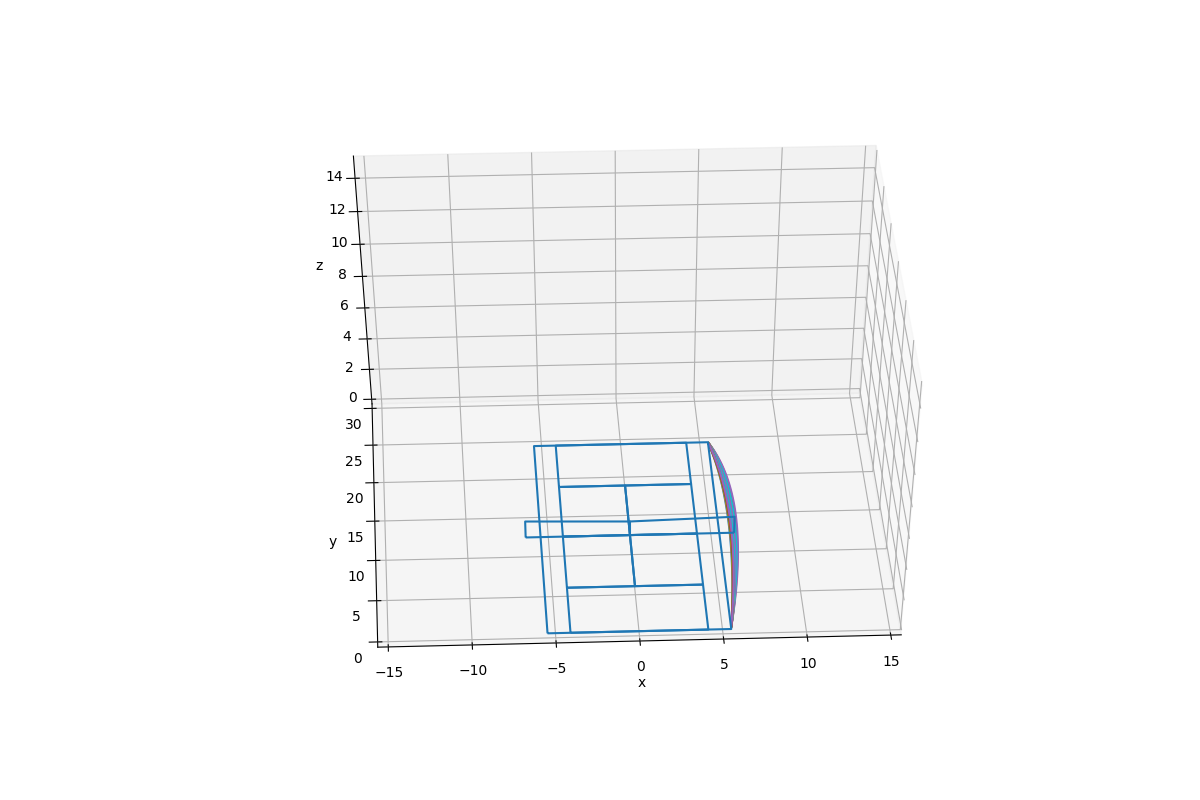

In [55]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x_min = - 15
x_max = 15
y_min = 0
y_max = 30
z_min = 0
z_max = 15

#ax.set_xlim([x_min, x_max][::-1])
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([z_min, z_max])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

for i in range(7):
    ax.plot_wireframe(coat_x[i], coat_y[i], coat_z)

ax.plot_wireframe(net_right_x, net_right_y, net_right_z)
ax.plot_wireframe(net_left_x, net_left_y, net_left_z)

# ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)
i = 0
for i in range(len(t_1)):
    for j in range(len(t_1[i])):
        ax.plot(X[i][j], Y[i][j], Z[i][j])

plt.show()

In [11]:
initial_velosity, spin_rate = np.meshgrid([i * 1000 / 3600 for i in range(60, 161, 20)], [i / 60 for i in range(500, 5001, 500)])

In [12]:
energy = (1/2 * m * initial_velosity**2) + (1/2 * I * (spin_rate * (2 * np.pi))**2) #J

In [22]:
p_y[0][0]

array([0, 0.159836140765707, 0.319672281531415, 0.479508422297122,
       0.639344563062830, 0.799180703828537, 0.959016844594245,
       1.11885298535995, 1.27868912612566, 1.43852526689137,
       1.59836140765707, 1.75819754842278, 1.91803368918849,
       2.07786982995420, 2.23770597071990, 2.39754211148561,
       2.55737825225132, 2.71721439301703, 2.87705053378273,
       3.03688667454844, 3.19672281531415, 3.35655895607986,
       3.51639509684556, 3.67623123761127, 3.83606737837698,
       3.99590351914269, 4.15573965990839, 4.31557580067410,
       4.47541194143981, 4.63524808220552, 4.79508422297122,
       4.95492036373693, 5.11475650450264, 5.27459264526835,
       5.43442878603405, 5.59426492679976, 5.75410106756547,
       5.91393720833118, 6.07377334909688, 6.23360948986259,
       6.39344563062830, 6.55328177139401, 6.71311791215971,
       6.87295405292542, 7.03279019369113, 7.19262633445683,
       7.35246247522254, 7.51229861598825, 7.67213475675396,
       7.831970

t_1_idx = find_nearest(t, t_1)[1]

$$ p_{x} = -\frac{1}{16}\pi^2 \frac{\rho}{m} d^3 N v_{0} \cos \omega_{0} \cos \theta_{0} t^{2} + (v_{0} \sin \theta_{0}) t + p_{0_{x}} $$
$$ p_{y} = \frac{1}{16}\pi^2 \frac{\rho}{m} d^3 N v_{0} \cos \omega_{0} \sin \theta_{0} t^{2} + (v_{0} \cos \theta_{0}) t + p_{0_{y}} $$
$$ p_{z} = \frac{1}{16}\pi^2 \frac{\rho}{m} d^3 N v_{0} \sin \omega_{0} t^{2} -\frac{1}{2} g t^{2} + (v_{0} \sin \phi_{0}) t + p_{0_{z}} $$

# 加速度

a_x = 1/8 * np.pi**2 * density_ball * d**3 * (v0 * np.cos(angle_rotation * (np.pi/180))) * N * np.cos(angle_direction_0 * (np.pi/180)) / m
a_y = 1/8 * np.pi**2 * density_ball * d**3 * (v0 * np.cos(angle_rotation * (np.pi/180))) * N * np.sin(angle_direction_0 * (np.pi/180)) / m
a_z = 1/8 * np.pi**2 * density_ball * d**3 * (v0 * np.sin(angle_rotation * (np.pi/180))) * N / m - g

# 速度

v_x = 1/8 * np.pi**2 * density_ball * d**3 * (v0 * np.cos(angle_rotation * (np.pi/180))) * N * np.cos(angle_direction_0 * (np.pi/180)) / m * t + v0 * np.cos(angle_direction_0 * (np.pi/180))
v_y = 1/8 * np.pi**2 * density_ball * d**3 * (v0 * np.cos(angle_rotation * (np.pi/180))) * N * np.sin(angle_direction_0 * (np.pi/180)) / m * t + v0 * np.sin(angle_direction_0 * (np.pi/180))
v_z = 1/8 * np.pi**2 * density_ball * d**3 * (v0 * np.sin(angle_rotation * (np.pi/180))) * N / m * t - g * t + v0 * np.sin(angle_projection_0 * (np.pi/180))

# 位置

p_x = ( - 1/16 * np.pi**2 * density_ball * d**3 * v0 * N * sp.cos(angle_direction_0 * (np.pi/180))) / m * t**2 + v0 * sp.sin(angle_direction_0 * (np.pi/180)) * t + p_0[0]
p_y = v0 * sp.cos(angle_direction_0 * (np.pi/180)) * t + p_0[1]
p_z = - 1/2 * g * t**2 + v0 * sp.sin(angle_projection_0 * (np.pi/180)) * t + p_0[2]

print(p_x[t_1_idx])
print(p_y[t_1_idx])
print(p_z[t_1_idx])

In [23]:
X = p_x
Y = p_y
Z = p_z

print(len(X))
print(len(Y))
print(len(Z))

print(X)
print(Y)
print(Z)

In [15]:
coat_z = np.array([0, 0, 0, 0, 0])

coat_x_1 = np.array([-5.485, 5.485, 5.485, -5.485, -5.485])
coat_y_1 = np.array([0, 0, 23.77, 23.77, 0])

coat_x_2 = np.array([-4.115, 4.115, 4.115, -4.115, -4.115])
coat_y_2 = np.array([0, 0, 5.485, 5.485, 0])

coat_x_3 = np.array([-4.115, 0, 0, -4.115, -4.115])
coat_y_3 = np.array([5.485, 5.485, 11.885, 11.885, 5.485])

coat_x_4 = np.array([4.115, 0, 0, 4.115, 4.115])
coat_y_4 = np.array([5.485, 5.485, 11.885, 11.885, 5.485])

coat_x_5 = np.array([-4.115, 0, 0, -4.115, -4.115])
coat_y_5 = np.array([11.885, 11.885, 18.285, 18.285, 11.885])

coat_x_6 = np.array([4.115, 0, 0, 4.115, 4.115])
coat_y_6 = np.array([11.885, 11.885, 18.285, 18.285, 11.885])

coat_x_7 = np.array([-4.115, 4.115, 4.115, -4.115, -4.115])
coat_y_7 = np.array([18.285, 18.285, 23.77, 23.77, 18.285])

net_right_x = np.array([-6.399, -6.399, 0, 0, -6.399])
net_right_y = np.array([11.885, 11.885, 11.885, 11.885, 11.885])
net_right_z = np.array([0, 1.07, 0.914, 0, 0])

net_left_x = np.array([6.399, 6.399, 0, 0, 6.399])
net_left_y = np.array([11.885, 11.885, 11.885, 11.885, 11.885])
net_left_z = np.array([0, 1.07, 0.914, 0, 0])


coat_x = np.array([coat_x_1, coat_x_2, coat_x_3, coat_x_4, coat_x_5, coat_x_6, coat_x_7])
coat_y = np.array([coat_y_1, coat_y_2, coat_y_3, coat_y_4, coat_y_5, coat_y_6, coat_y_7])

#coat_y_1 = np.array([-5.485, 5.485, 5.485, -5.485, -5.485])

<IPython.core.display.Javascript object>


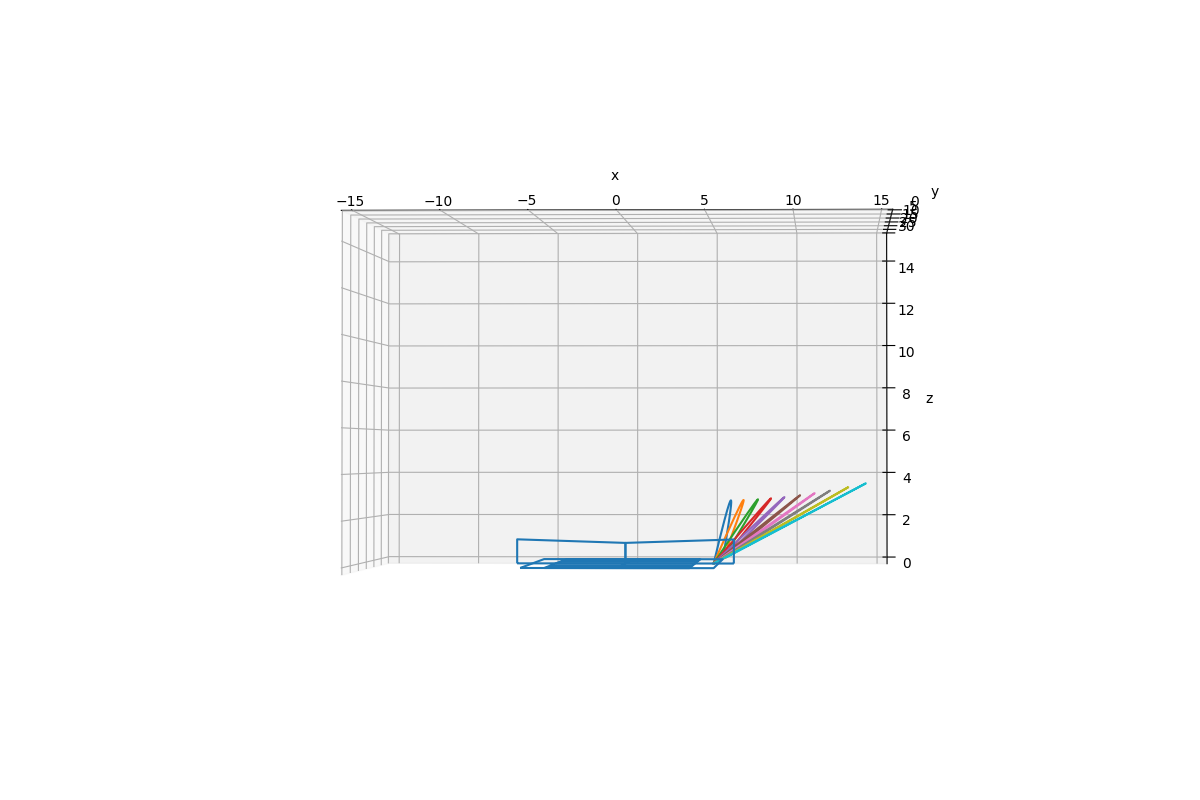

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x_min = - 15
x_max = 15
y_min = 0
y_max = 30
z_min = 0
z_max = 15

#ax.set_xlim([x_min, x_max][::-1])
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([z_min, z_max])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

for i in range(7):
    ax.plot_wireframe(coat_x[i], coat_y[i], coat_z)

ax.plot_wireframe(net_right_x, net_right_y, net_right_z)
ax.plot_wireframe(net_left_x, net_left_y, net_left_z)

# ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)
#for i in range(len(t_1)):
i = 0
for j in range(len(t_1[i])):
    ax.plot(X[i][j], Y[i][j], Z[i][j])

plt.show()

<IPython.core.display.Javascript object>


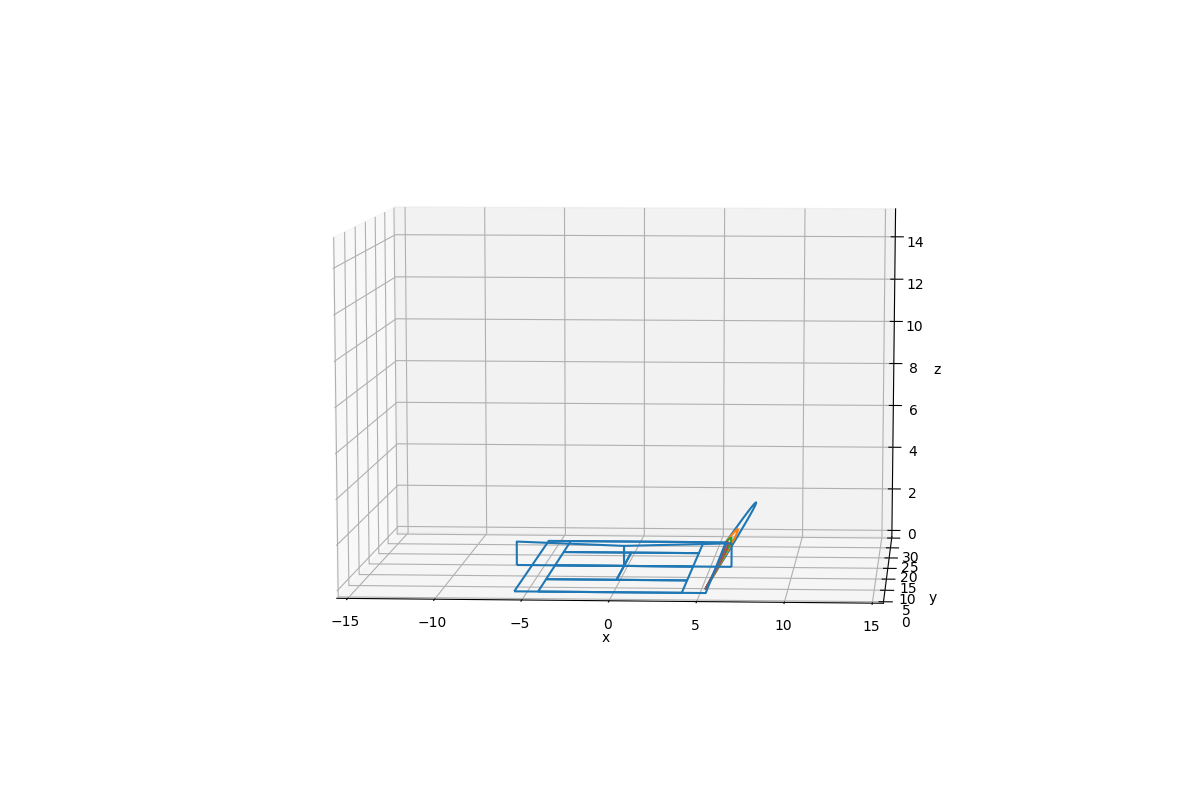

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x_min = - 15
x_max = 15
y_min = 0
y_max = 30
z_min = 0
z_max = 15

#ax.set_xlim([x_min, x_max][::-1])
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([z_min, z_max])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

for i in range(7):
    ax.plot_wireframe(coat_x[i], coat_y[i], coat_z)

ax.plot_wireframe(net_right_x, net_right_y, net_right_z)
ax.plot_wireframe(net_left_x, net_left_y, net_left_z)

# ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)
#for i in range(len(t_1)):
j = 2
for i in range(len(t_1)):
    ax.plot(X[i][j], Y[i][j], Z[i][j])

plt.show()

In [29]:
Energy = (1/2 * m * v0**2) + (1/2 * I * N**2)

In [25]:
print(round(Energy, 2), 'J')

240.83 J


In [ ]:
len(X)

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x_min = - 15
x_max = 15
y_min = 0
y_max = 30
z_min = 0
z_max = 30


#ax.set_xlim([x_min, x_max][::-1])
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([z_min, z_max])




"""ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(40))

ax.yaxis.set_major_locator(MultipleLocator(40))"""

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

#ax.plot(X, Y, Z)

for i in range(7):
    ax.plot_wireframe(coat_x[i], coat_y[i], coat_z)
#ax.plot_wireframe(net_right_x, net_right_y, net_right_z)
#ax.plot_wireframe(net_left_x, net_left_y, net_left_z)

# ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)
# ax.scatter(X, Y, Z, s=1)
plt.show()